### Data investigation using Numpy and Pandas

#### Subhasree

#### INTRODUCTION

This analysis is based on Lahman's Baseball Database - http://www.seanlahman.com/baseball-archive/statistics/. 
The database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2015.

Through analysis answered the following questions:

* What is the relationship between OBP (On-Base-Percentage) and team's success?

* What is the relationship between team's payroll and wins in 2015?

* What is the relationship between pitcher's ERA (Earned Run Average) and his salary?

* What is the relationship between batter's home runs and his salary?

* Who is the highest paid player? Who are the top 10s?

#### TABLES USED

* Teams.csv
* Batting.csv
* Pitching.csv
* Salaries.csv
* Master.csv

Used most relevant and recent data from 2010 to 2015 from all tables except Master Table.

#### IMPORTING NECESSARY MODULES

In [1]:
# Importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

#### DATA ACQUISITION

In [15]:
# Extract dataframe year start from 2010

teams = pd.read_csv('C:/Users/chinnase/AppData/Local/Continuum/Anaconda3/baseballdatabank-2017.1/core/Teams.csv')
teams_since_2010 = teams.loc[teams.yearID >= 2010]

pitching = pd.read_csv('C:/Users/chinnase/AppData/Local/Continuum/Anaconda3/baseballdatabank-2017.1/core/Pitching.csv')
pitching_since_2010 = pitching.loc[pitching.yearID >= 2010]

batting = pd.read_csv('C:/Users/chinnase/AppData/Local/Continuum/Anaconda3/baseballdatabank-2017.1/core/Batting.csv')
batting_since_2010 = batting.loc[batting.yearID >= 2010]

salaries = pd.read_csv('C:/Users/chinnase/AppData/Local/Continuum/Anaconda3/baseballdatabank-2017.1/core/Salaries.csv')
salaries_since_2010 = salaries.loc[salaries.yearID >= 2010]

master = pd.read_csv('C:/Users/chinnase/AppData/Local/Continuum/Anaconda3/baseballdatabank-2017.1/core/Master.csv')


**1.To find the relationship between OBP (On-Base-Percentage) and team's success, performing data wrangling for the table first - teams_since_2010 **
* ** Looking for missing values and correcting data inconsistencies **

In [16]:
# Check for any missing values in the dataframe 

teams_since_2010.isnull().values.any()

False

In [17]:
# Check for correctness of data type to perform vectorized operation

teams_since_2010.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                  int64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

** Calculating On-Base-Percentage Value**

In [18]:
# Adding a new column - OBP (On-Base-Percentage)

pd.options.mode.chained_assignment = None  

# Caculate the value for OBP

teams_since_2010['OBP'] = (teams_since_2010['H'] + teams_since_2010['BB']) / teams_since_2010['AB']

In [19]:
# checking whether the new column OBP has been added or not

teams_since_2010.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,OBP
2625,2010,NL,ARI,ARI,W,5,162,81.0,65,97,...,0.983,Arizona Diamondbacks,Chase Field,2056941.0,104,105,ARI,ARI,ARI,0.357208
2626,2010,NL,ATL,ATL,E,2,162,81.0,91,71,...,0.980,Atlanta Braves,Turner Field,2510119.0,98,97,ATL,ATL,ATL,0.374336
2627,2010,AL,BAL,BAL,E,5,162,81.0,66,96,...,0.982,Baltimore Orioles,Oriole Park at Camden Yards,1733018.0,101,102,BAL,BAL,BAL,0.335614
2628,2010,AL,BOS,BOS,E,3,162,81.0,89,73,...,0.982,Boston Red Sox,Fenway Park II,3046443.0,106,105,BOS,BOS,BOS,0.371591
2629,2010,AL,CHA,CHW,C,2,162,81.0,88,74,...,0.983,Chicago White Sox,U.S. Cellular Field,2194378.0,105,105,CHW,CHA,CHA,0.352662


** Finding the relationship between OBP (On-Base-Percentage) and team's success**

In [21]:
# Function to compute the correlation between these two variables

def correlation(x,y):
    return ((x-x.mean())*(y-y.mean())).mean() / (x.std(ddof=0) * y.std(ddof=0))

wins=teams_since_2010['W']
on_base_percentage = teams_since_2010['OBP']

print('Correlation of On-Base-Percentage to wins 2010-2015')
print(correlation(on_base_percentage, wins))

Correlation of On-Base-Percentage to wins 2010-2015
0.5271972110078358


**Visualization for better understanding**

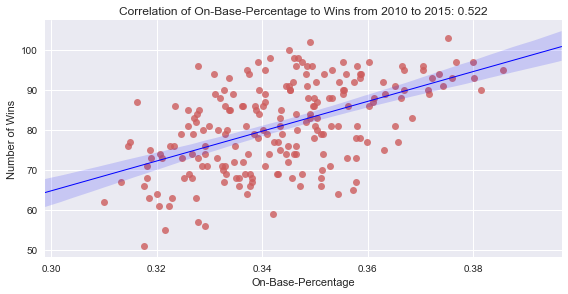

In [22]:
#Regression model plot

sns.lmplot('OBP', "W", teams_since_2010, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, size = 4, aspect = 2)

plt.title('Correlation of On-Base-Percentage to Wins from 2010 to 2015: 0.522')
plt.xlabel('On-Base-Percentage')
plt.ylabel('Number of Wins')

From the plot,it appears that OBP(On-Base-Percentage) has a medium correlation with team's winning from 2010 to 2015.

**2. To find the relationship between team's payroll and wins in 2015 we need two tables salaries_since_2010 and teams_since_2010 performing data wrangling for these tables. **


In [23]:
# Checking for any NaN value in salaries table

salaries_since_2010.isnull().values.any()

False

In [24]:
# Checking for "zero" value in salaries table

salaries_since_2010[salaries_since_2010["salary"] == 0]


,yearID,teamID,lgID,playerID,salary


In [25]:
# Making sure whether data types are all correct or not to perform vectorized operation

salaries_since_2010.dtypes



yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object

In [26]:
# In teams table we will only need column 'W', so making sure it contains no missing value ij this column

teams_since_2010['W'].isnull().values.any()

False

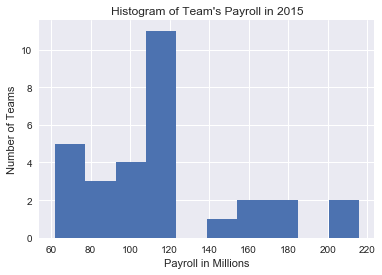

In [27]:
# Plotting histogram to understand the team payroll's distribution in 2015

salaries_by_yearID_teamID = salaries_since_2010.groupby(['yearID', 'teamID'])['salary'].sum()/1000000
salaries_by_yearID_teamID.loc[2015].hist()

plt.title("Histogram of Team's Payroll in 2015")
plt.xlabel('Payroll in Millions')
plt.ylabel('Number of Teams')

From the plot,we can see the most frequent team payroll is around 110 million to 120 million (approx 11 teams in this range). Two teams pay 200 million to 220 millions to their players.


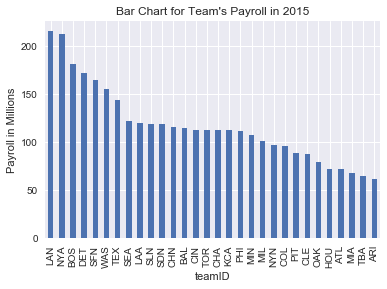

In [28]:
# Plotting a bar chart to see each team and their payroll

salaries_by_yearID_teamID.loc[2015].sort_values(ascending=False).plot(kind='bar')
plt.title("Bar Chart for Team's Payroll in 2015")
plt.ylabel("Payroll in Millions")

Next,we will find the maximum and minimum player's salary for each year from 2010 to 2015.

In [29]:
# Function to find maximum and minimum player's salary for each year from 2010 to 2015.
# Set the year as index
salaries_indexed = salaries_since_2010.set_index('yearID')

# calculate the max and min salary for any year from 2010 to 2015

def min_and_max_salary_per_year(salaries):
    
    max_salary_per_year = salaries.max()  
    min_salary_per_year = salaries.min()
    
    return (max_salary_per_year, min_salary_per_year)

print("Max and Min player's salary for 2014")
print(min_and_max_salary_per_year(salaries_indexed.loc[2014]['salary'])) #Finding max and min for 2014

Max and Min player's salary for 2014
(26000000, 500000)


Next, to find the correlation between team's payroll and wins first we need to need to merge these two tables - teams_since_2010 & salaries_since_2010. Then groupby teamID and yearID, extract total wins and payroll for each team, then get the year I am interested in - 2015.

In [30]:
# In order to find the correlation between team's win and payroll, I need to merge team table and salaries table

teams_and_salaries = teams_since_2010.merge(salaries_since_2010, on=['yearID', 'teamID', 'lgID'], how='inner')

# Double check the two tables has been merged

teams_and_salaries.head(3)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,OBP,playerID,salary
0,2010,NL,ARI,ARI,W,5,162,81.0,65,97,...,Chase Field,2056941.0,104,105,ARI,ARI,ARI,0.357208,abreuto01,407000
1,2010,NL,ARI,ARI,W,5,162,81.0,65,97,...,Chase Field,2056941.0,104,105,ARI,ARI,ARI,0.357208,boyerbl01,725000
2,2010,NL,ARI,ARI,W,5,162,81.0,65,97,...,Chase Field,2056941.0,104,105,ARI,ARI,ARI,0.357208,drewst01,3400000


In [31]:
# Then group yearID and teamID, extract total wins and payrolls for each team 

teams_and_salaries_grouped = teams_and_salaries.groupby(['yearID', 'teamID']).sum()[['W', 'salary']]

# And get the numbers for 2015

teams_and_salaries_grouped.loc[2015].head()

,W,salary
teamID,,
ARI,2212,56959000
ATL,1608,71781250
BAL,2268,115044833
BOS,2496,181103400
CHA,2052,112373700


In [32]:
# Using the function defined earlier to compute the correlation

print("Correlation of team's payroll to wins 2015")
print(correlation(teams_and_salaries_grouped.loc[2015]['W'], teams_and_salaries_grouped.loc[2015]['salary']))

Correlation of team's payroll to wins 2015
0.3370214688460138


** Visualization **

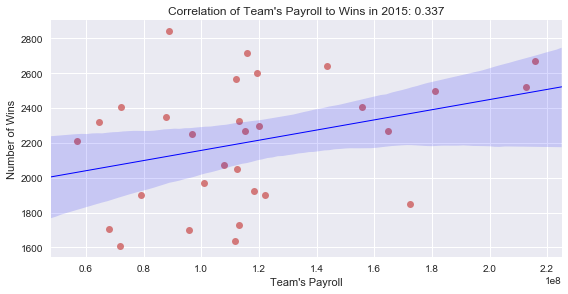

In [33]:
# Apply to a regression model plot

sns.lmplot('salary', "W", teams_and_salaries_grouped.loc[2015], scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, size = 4, aspect = 2)

plt.title("Correlation of Team's Payroll to Wins in 2015: 0.337")
plt.xlabel("Team's Payroll")
plt.ylabel('Number of Wins')

From the graph, we can see that the amount of money spent on team's payroll have a positve correlation with the winning in 2015. However, this relationship is not strong. There are teams with similar budget on payroll but have a huge difference in number of wins (range from approx 1600 to more than 2700), and there are teams with small budget has won as many times as big budget teams. As a matter of fact, from the above graph, the team that had the most successes is a small budget team. Therefore, from the above analysis, we can't say that payroll is a predictor of a team's success.


** 3. To find the relationship between pitcher's ERA (Earned Run Average) and his salary we need two tables - pitching_since_2010 & salaries_since_2010. First performing data wrangling for pitching table first, then merging these two tables.**


In [34]:
# Looking for missing values
pd.isnull(pitching_since_2010).sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
W           0
L           0
G           0
GS          0
CG          0
SHO         0
SV          0
IPouts      0
H           0
ER          0
HR          0
BB          0
SO          0
BAOpp       3
ERA         6
IBB         0
WP          0
HBP         0
BK          0
BFP         0
GF          0
R           0
SH          0
SF          0
GIDP        0
dtype: int64

In [37]:
# We are interested in "ERA' column but there are seven missing valuse in this column hence removing them
# Using numpy isfinite() to take only rows where 'ERA' is finite

pitching_since_2010 = pitching_since_2010[np.isfinite(pitching_since_2010['ERA'])]

In [38]:
# Making sure there is no missing value in ERA column anymore

pd.isnull(pitching_since_2010).sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
W           0
L           0
G           0
GS          0
CG          0
SHO         0
SV          0
IPouts      0
H           0
ER          0
HR          0
BB          0
SO          0
BAOpp       1
ERA         0
IBB         0
WP          0
HBP         0
BK          0
BFP         0
GF          0
R           0
SH          0
SF          0
GIDP        0
dtype: int64

In [39]:
# Merging pitching table and salaries table

pitching_and_salaries = pitching_since_2010.merge(salaries_since_2010, on=['playerID', 'yearID', 'teamID', 'lgID'], 
                                                  how='inner')

# Group players and get the average ERA and salary for each player from 2010 to 2015

pitching_and_salaries_grouped = pitching_and_salaries.groupby('playerID').mean()[['ERA', 'salary']]

Computing  the correlation of pitcher's ERA and his salary after grouping players and finding average ERA and salary for each player from 2010 to 2015.

In [40]:
# Function to get the correlation of ERA and salary

print("Correlation of pitcher's ERA to salary 2010-2015")
print(correlation(pitching_and_salaries_grouped['ERA'], pitching_and_salaries_grouped['salary']))

Correlation of pitcher's ERA to salary 2010-2015
-0.10701556442060597


** Visualization: **

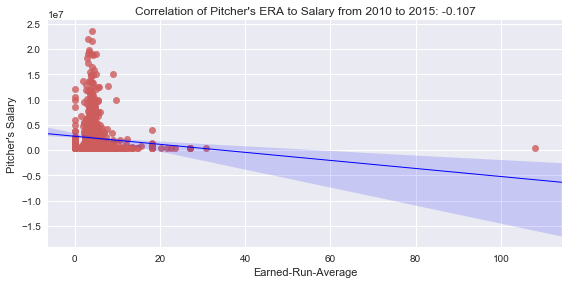

In [41]:
# Using regression model plot for  correlation analysis

sns.lmplot('ERA', "salary", pitching_and_salaries_grouped, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, size = 4, aspect = 2)

plt.title("Correlation of Pitcher's ERA to Salary from 2010 to 2015: -0.107")
plt.xlabel('Earned-Run-Average')
plt.ylabel("Pitcher's Salary")


The lower correlation between ERA and salary shows that ERA is not a indicator of how valuable a pitcher is. Starting pitchers tend to get less salary for the same ERA. So wecan't predicate salary from ERA.


** 4. To find the relationship between batter's home runs and his salary we need two tables - battings_since_2010 & salaries_since_2010. First, performing data wrangling, then merge the two tables.**


In [42]:
# Checking for missing values
pd.isnull(batting_since_2010).sum()

playerID    0
yearID      0
stint       0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
dtype: int64

For better understanding the batter's home run with his salary, categorizing the batter's salary to three categories - High (higher than 10 million), Medium (between 1 million and 10 million) and Low (lower than 1 million), and add a "Class" column.


In [43]:
#Function for the new class column

def classifier(row):
    if row["salary"] > 10000000:
        return 'High'
    elif row["salary"] >= 1000000:
        return "Medium"
    else:
        return "Low"
    
salaries_since_2010['Class'] = salaries_since_2010.apply(classifier, axis=1) # Add a new column - Class

In [44]:
# Making sure column has been added

salaries_since_2010.head()

,yearID,teamID,lgID,playerID,salary,Class
20624,2010,ARI,NL,abreuto01,407000,Low
20625,2010,ARI,NL,boyerbl01,725000,Low
20626,2010,ARI,NL,drewst01,3400000,Medium
20627,2010,ARI,NL,gutieju01,411000,Low
20628,2010,ARI,NL,harenda01,8250000,Medium


In [46]:
# Merging two tables - batting table and salaries table

batting_and_salaries = batting_since_2010.merge(salaries_since_2010, on=['yearID', 'teamID', "playerID", 'lgID'], 
                                                how='inner')

In [47]:
# Making sure whether succesfully merged or not
batting_and_salaries.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,Class
0,aardsda01,2010,1,SEA,AL,53,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2750000,Medium
1,abreubo01,2010,1,LAA,AL,154,573,88,146,41,...,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,9000000,Medium
2,abreuto01,2010,1,ARI,NL,81,193,16,45,11,...,1.0,4,47.0,0.0,0.0,0.0,4.0,8.0,407000,Low
3,accarje01,2010,1,TOR,AL,5,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1080000,Medium
4,aceveal01,2010,1,NYA,AL,10,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,435650,Low


In [48]:
# Extracting the metrics we interested in - mean HR (home run) and salary for each batter, grouped by salary class

batting_and_salaries_grouped = batting_and_salaries.groupby(['Class', 'playerID']).mean()[['HR', 'salary']]

In [50]:
# Function to calculate the correlation these two variables in different salary class groups

print('Correlation of home run to salary for players who earn more than $10 million per year')
print(correlation(batting_and_salaries_grouped.loc['High']['HR'], batting_and_salaries_grouped.loc['High']['salary']))
print(' ')
print('Correlation of home run to salary for players who make $1 million to $10 million per year')
print(correlation(batting_and_salaries_grouped.loc['Medium']['HR'], batting_and_salaries_grouped.loc['Medium']['salary']))
print(' ')
print('Correlation of home run to salary for players who earn below $1 million per year')
print(correlation(batting_and_salaries_grouped.loc['Low']['HR'], batting_and_salaries_grouped.loc['Low']['salary']))

Correlation of home run to salary for players who earn more than $10 million per year
0.15575556731016257
 
Correlation of home run to salary for players who make $1 million to $10 million per year
0.2772074450031736
 
Correlation of home run to salary for players who earn below $1 million per year
-0.02333898369382675



From the batting statistics analysis, we can see that players earning the lowest salaries show the lowest correlations, and a high salary does not necessarily indicate a strong home run performance. However, for players who I categorized as medium salary players, it seems that salary has a relatively higher correlation with home run performance when compare with low salary and high salary players.


** 5. Finding the highest paid, and who are the top 10s.**


In [51]:
# Extract the top 10 highest paid on average from 2010-2015

top_ten = salaries_since_2010.groupby('playerID').mean()['salary'].sort_values(ascending=False).head(10)

In [52]:
# Here is the top 10 salary list
top_ten

playerID
rodrial01    2.783333e+07
sabatc.01    2.500000e+07
sabatcc01    2.364286e+07
teixema01    2.267857e+07
wellsve01    2.267634e+07
tanakma01    2.200000e+07
cabremi01    2.200000e+07
santajo01    2.164481e+07
mauerjo01    2.150000e+07
howarry01    2.150000e+07
Name: salary, dtype: float64

Now, we need a new column in master table that combine Firstname and Lastname in the format of 'Firstname Lastname', then drop the previous 'nameFirst' & 'nameLast' columns.


In [53]:
# From master table, combining the nameFirst and nameLast columns to one column - fullName, 
# and the name in the format of 'Firstname Lastname'

master['fullName'] = master['nameFirst'] + ' ' + master['nameLast']

In [54]:
# Removing old columns

master.drop(['nameFirst', 'nameLast'], inplace=True, axis=1)

There are some  missing values in player's weight and height columns. Let's fill them by taking the average.


In [55]:
# Checking for NaN values in weight and height columns

master[['weight', 'height']].isnull().values.any()

True

In [57]:
# Filling the missing values in weight and height columns by the average 

master['weight'].fillna(master['weight'].mean(), inplace = True)
master['height'].fillna(master['height'].mean(), inplace = True)



In [58]:
# Double check the missing values have been filled

master[['weight', 'height']].isnull().values.any()

False

In [59]:
# Set playerID to index

master.set_index('playerID', inplace=True)

**Top 10 highest paid baseball players on average from 2010 to 2015.**


In [60]:
# Concatenate a Series and DataFrame, return a DataFrame with all top_10 highest paid players informaton.

pd.concat([top_ten, master.loc[top_ten.index]], axis=1)

,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,fullName
playerID,,,,,,,,,,,,,,,,,,,,,
rodrial01,2.783333e+07,1975.0,7.0,27.0,USA,NY,New York,NaN,NaN,NaN,...,Alexander Enmanuel,230.0,75.0,R,R,1994-07-08,2016-08-12,rodra001,rodrial01,Alex Rodriguez
sabatc.01,2.500000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sabatcc01,2.364286e+07,1980.0,7.0,21.0,USA,CA,Vallejo,NaN,NaN,NaN,...,Carsten Charles,300.0,78.0,L,L,2001-04-08,2016-09-29,sabac001,sabatc.01,CC Sabathia
teixema01,2.267857e+07,1980.0,4.0,11.0,USA,MD,Annapolis,NaN,NaN,NaN,...,Mark Charles,225.0,75.0,B,R,2003-04-01,2016-10-02,teixm001,teixema01,Mark Teixeira
wellsve01,2.267634e+07,1978.0,12.0,8.0,USA,LA,Shreveport,NaN,NaN,NaN,...,Vernon M.,230.0,73.0,R,R,1999-08-30,2013-09-29,wellv001,wellsve01,Vernon Wells
tanakma01,2.200000e+07,1988.0,11.0,1.0,Japan,Hyogo,Itami,NaN,NaN,NaN,...,Masahiro,215.0,75.0,R,R,2014-04-04,2016-09-21,tanam001,tanakma01,Masahiro Tanaka
cabremi01,2.200000e+07,1983.0,4.0,18.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,...,Jose Miguel,240.0,76.0,R,R,2003-06-20,2016-10-02,cabrm001,cabremi01,Miguel Cabrera
santajo01,2.164481e+07,1979.0,3.0,13.0,Venezuela,Merida,Tovar,NaN,NaN,NaN,...,Johan Alexander,210.0,72.0,L,L,2000-04-03,2012-08-17,santj003,santajo02,Johan Santana
mauerjo01,2.150000e+07,1983.0,4.0,19.0,USA,MN,St. Paul,NaN,NaN,NaN,...,Joseph Patrick,225.0,77.0,L,R,2004-04-05,2016-09-25,mauej001,mauerjo01,Joe Mauer


#### CONCLUSIONS

* Payroll is not the most significant factor, at least not for the 2015 season. 
* There are countless factors that contribute to a winning team from owners to managers to players to fan attendance. To explore the best model to predict winning, rigorous hypothesis testings are needed (i.e. one sample hypothesis testing for salary to winning correlation).
* In addition, for individual players, the correlation between performance and salary in baseball has been studied extensively. However, there is no single factor that can predict a player's pay. To proper understand the relationship between salary and on-field performance, not only we need to perform rigorous hypothesis testings on many variables, but also we need to understand how wage are determined in baseball. Those are the limitations for this analysis.
* For the future research, I am interested in exploring the best way to field a team, and the best way to allocate resources to secure the most possible wins.
